# Assignment
The basic problem is the emergence of an unknown infectious disease. There is 1 person infectious and a population of 100000 is susceptible. The character of the disease is unknown up front. The challenge is to design a strategy to prevent a disruptive outbreak, while the invasiveness of the strategy should be kept proportional to the severity of the disease. That is, there is no reason to quarantine everyone and close schools etc. if there is no evidence that the disease is really serious. 

The following table specifies the uncertainties surrounding the outbreak. They have been informed by experience with previous outbreaks of a wide range of diseases. 

|Uncertainties              |Range	        |Default value|
|--------------------------:|--------------:|------------:|
|Average incubation time   	|0.5 – 14	    |2            |
|Average infectious period	|7 – 21      	|14           |
|Basic reproduction number 	|0.5 – 5	    |2            |
|Case fatality rate	        |0.01 – 0.5	    |0.01         |
|Switch SEIR or SIR     	|{1, 0}	        |0            |

The following initial values should be used

|Constants                       | Value |
|-------------------------------:|------:|
|Initial deceased population     |0      |
|Initial exposed population      |0      |
|Initial infectious population   |1      |
|Initial recovered population    |0      |
|Initial susceptible population  |100000 |

The model is provided as a vensim mdl file (EIR or SIR 20170501.mdl), but is importable using pysd. That is, you should be able to work with the model also on a mac and with Python 64 bit. Any interventions can be added to the model through vensim before importing the modified model into pysd. For those of you who don't have pysd installed, it is available through pip. 

A starting point for inspiration for the assignment is the work of Willem Auping, Erik Pruyt and me on the Mexican Flu and Ebola. A quick search in Scopus should point you to the relevant papers. To get a sense for how decision making takes place during massive pandemics, a further literature search on either the most recent ebola outbreak or the Mexican flu should turn up relevant papers. 


## Key requirements of the assignment
* Any modeled interventions should have a clear real world meaning, and the link between the model and the real world interpretation should be given.
* The design of any candidate intervention should be clearly motivated
* Not all relevant decision considerations can be covered by the model, a proper balance between modeling and qualitative reasoning is thus required. For example, the default model only covers the dynamics of a disease, and not the disruptive impact of quarantines and social distancing polices (e.g. closing schools).

## Key Deliverables
* a final report with a motivated strategy for counteracting the disease
* a reflection on the advice given the political context of time urgent high risk decision making as typically encountered during pandemic outbreaks
* a collection of reproducible model based analyses that were conducted while crafting the strategy. Here reproducible means that anyone of your fellow students should be able to rerun your analyses. This entails clear explicit documentation of your code, clearly state any non-standard dependencies, and ensure that all the relevant files etc. are submitted in a clear directory structure. In addition, there should be an explicit motivation for each analysis step. This motivation should involve references to relevant literature where appropriate (see also http://nbviewer.jupyter.org/github/ipython/nbconvert-examples/blob/master/citations/Tutorial.ipynb for one way of doing this in notebooks). 

Time permitting, I plan to do a friendly bake-off where I will compare the performance of all strategies from all groups over a set of scenarios. There might be some black swans amongst the scenarios.... . This bake-off will result in a many-objective robustness ranking of all strategies. To make this work, it is paramount that I receive from each group a vensim / pysd model with the final advised strategy, and the associated python code for running the model. 

## Grading considerations
* appropriate and correct use of various exploratory modeling techniques
* quality of interpretation of exploratory modeling results
* clarity of reasoning in translating interpretation of exploratory modeling results into candidate interventions
* use of additional literature beyond course readings
* the correctness of translating a strategy into the System Dynamics model. Given that System Dynamics is not the focus of this core, this criterion will not be weighted to heavily. 




In [1]:
from ema_workbench.connectors.vensim import VensimModel

In [2]:
from ema_workbench import (RealParameter, TimeSeriesOutcome,ema_logging,
                           perform_experiments)


In [3]:
ema_logging.log_to_stderr(ema_logging.INFO);

In [4]:
mdl_file = 'model/SEIR or SIR 20170501.vpm'


In [14]:
model = VensimModel("defaultModel",model_file=mdl_file)

model.uncertainties = [
    RealParameter("Basic reproduction number",0.5,5)
#     RealParameter()
#     RealParameter()
#     RealParameter()
#     RealParameter()
]

model.outcomes = [
    TimeSeriesOutcome("Deceased population"),
    TimeSeriesOutcome("Infectious population")
]

In [15]:

results = perform_experiments(model,1000)

[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished


In [7]:
from ema_workbench.analysis import pairs_plotting

c:\users\gebruiker\anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
c:\users\gebruiker\anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [8]:
import matplotlib.pyplot as plt

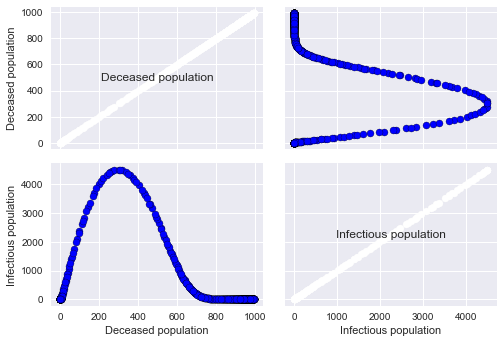

In [16]:
pairs_plotting.pairs_scatter(results)
plt.show()

In [7]:
from ema_workbench import Scenario, Policy

model.run_model(Scenario(1, **{}), Policy(2, **{}))

ParseError: Rule 'subscript' didn't match at '(A1-A100)' (line 1, column 10).